In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.array([[7, 5], [5, 7], [7, 7], [3, 3], [4, 6], [1, 4]])
data.shape

(6, 2)

In [ ]:
def updateCentroid(dataTraining, minDist, k):
  centroid = np.zeros((k, dataTraining.shape[1]))

  for i in range(k):
    centroid[i] = np.sum(dataTraining[minDist == i], axis = 0) / np.sum(minDist == i)
  
  return centroid


def trainKMeans(dataTraining, k, numOfEpoch):
  centroid = np.array([[5, 7], [7, 7]])
  numOfData = dataTraining.shape[0]

  for ep in range(numOfEpoch):
    dist = np.zeros((numOfData, k))
    cluster = np.zeros((numOfData))

    for i in range(numOfData):
      for j in range(k):
        dist[i, j] = np.sqrt(np.sum((data[i] - centroid[j]) ** 2))

      cluster[i] = np.argmin(dist[i])

    centroid = updateCentroid(dataTraining, cluster, k)

    # print(dist)
    # print(cluster)
    # print(centroid)

  return centroid

In [ ]:
centroid = trainKMeans(data, 2, 10)
centroid

array([[2.66666667, 4.33333333],
       [6.33333333, 6.33333333]])

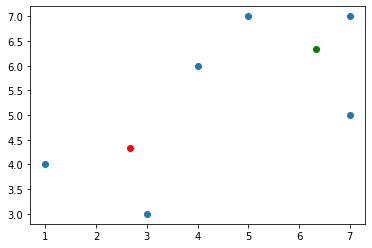

In [ ]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centroid[0, 0], centroid[0, 1], c = 'red')
plt.scatter(centroid[1, 0], centroid[1, 1], c = 'green')

# Image Segmentation

In [ ]:
from sklearn.cluster import KMeans

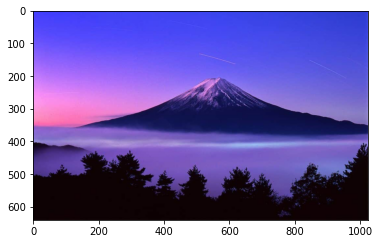

In [ ]:
image = plt.imread('gunung_fuji.jpeg')
plt.imshow(image)

In [ ]:
image.shape

(640, 1024, 3)

In [ ]:
height, width, channel = image.shape

reshapedData = np.reshape(image, (height * width, channel))
reshapedData.shape

(655360, 3)

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(reshapedData)

KMeans(n_clusters=4)

In [ ]:
centers = k_means.cluster_centers_
centers

array([[182.72212492, 123.32720954, 226.23087276],
       [ 30.99617162,  28.28412841,  88.94642664],
       [ 94.56109728,  84.21349232, 220.12160643],
       [ 14.5192106 ,   2.71800818,   6.72197439]])

In [ ]:
convertCenters = np.uint8(centers)
convertCenters

array([[182, 123, 226],
       [ 30,  28,  88],
       [ 94,  84, 220],
       [ 14,   2,   6]], dtype=uint8)

In [ ]:
segmentImage = k_means.predict(reshapedData)
segmentImage.shape

(655360,)

In [ ]:
reshapeSegment = np.reshape(segmentImage, (height, width))
reshapeSegment.shape

(640, 1024)

In [ ]:
reshapeSegment[:10, :]

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int32)

In [ ]:
newImage = np.zeros((height * width, channel))
newImage.shape

(655360, 3)

In [ ]:
newImage[0]

array([0., 0., 0.])

In [ ]:
image[0]

array([[ 72,  74, 253],
       [ 68,  70, 249],
       [ 64,  66, 247],
       ...,
       [ 48,  62, 211],
       [ 52,  66, 215],
       [ 56,  70, 219]], dtype=uint8)

In [ ]:
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0]]

for i in range(newImage.shape[0]):
  newImage[i] = colors[segmentImage[i]]

newImage = newImage.reshape((image.shape))
newImage.shape

(640, 1024, 3)

In [ ]:
newImage[0]

array([[  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       ...,
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


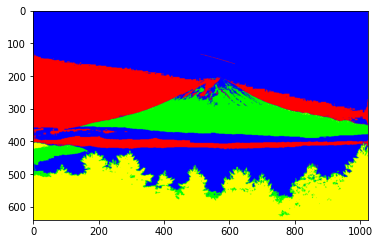

In [ ]:
plt.imshow(newImage)

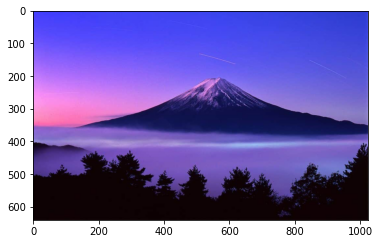

In [ ]:
plt.imshow(image)